# PJ01 Choose Your Own Analysis

Hypothesis: I think most students who have taken another AP computer science class (AP CS or AP A) will find COMP110 to be easier ( < 4 ).

In [9]:
%reload_ext autoreload
%autoreload 2

First I will read in the csv and convert it to a column-oriented data table.

In [10]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

Next, since I am focusing on AP classes in relation to COMP110 difficulty, I will select the 'AP_A', 'AP_Principles', and difficulty columns. I've included the first 6 rows.

In [11]:
from data_utils import head, select, cs_course_response
from tabulate import tabulate

subset: dict[str, list[str]] = select(columns, ["AP_A", "AP_Principles", "difficulty"])

tabulate(head(subset, 6), subset.keys(), "html")

AP_A,AP_Principles,difficulty
,,5
,,3
,,5
,,6
,,4
Yes,Yes,5


Since the AP columns correspond to optional question, there are a lot of blank spaces. I'm going to create a new table where in every row, at least one of the answers is "yes." This is my helper function and I've included the first 10 rows.

In [12]:
from data_utils import cs_course_response

cs_subset: dict[str, list[str]] = cs_course_response(subset, "Yes")

tabulate(head(cs_subset, 10), cs_subset.keys(), "html")

AP_A,AP_Principles,difficulty
Yes,Yes,5
Yes,No,4
Yes,No,2
Yes,No,4
Yes,No,4
Yes,Yes,3
Yes,No,3
Yes,Yes,4
Yes,No,5
Yes,No,4


Finallly, I will count how many of these responses are rated < 4.

In [13]:
from data_utils import count

counts_difficulty = count(cs_subset['difficulty'])

print("1 = very easy")
print("7 = very hard")
print(f"Of the students {len(cs_subset['difficulty'])} that took an AP course, {counts_difficulty['1'] + counts_difficulty['2'] + counts_difficulty['3']} students rate COMP110 a 3 or below")

1 = very easy
7 = very hard
Of the students 81 that took an AP course, 37 students rate COMP110 a 3 or below


# Visual Number 1

I will be using Seaborn for my visuals.

My first visual will be a bar chart of the class difficulty based on all responses. 
The first code cell is the compilation of all difficulty data values. The second code cell will be the actual creation of the chart. 


In [6]:
from data_utils import select, count

difficulty: dict[str, list[str]] = select(columns, ["difficulty"])
counts = count(subset['difficulty'])
count_dict: dict[str, list[int]] = {'dif': [1, 2, 3, 4, 5, 6, 7], 'student': [(counts['1']), (counts['2']), (counts['3']), (counts['4']),(counts['5']), (counts['6']), (counts['7'])]}

tabulate(count_dict, count_dict.keys(), "html")

dif,student
1,11
2,32
3,54
4,120
5,158
6,112
7,86


Text(0, 0.5, 'Number of Students')

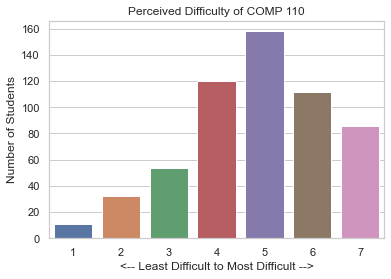

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = "whitegrid")

sns.barplot(x = 'dif', y = 'student', data = count_dict).set_title("Perceived Difficulty of COMP 110")
plt.xlabel("<-- Least Difficult to Most Difficult -->")
plt.ylabel("Number of Students")



# Visual Number 2

The second visual will be a bar chart of class difficulty according to the students who took AP classes.

Text(0, 0.5, 'Number of Students')

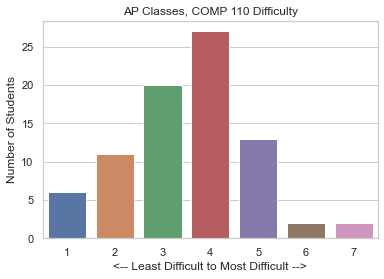

In [8]:
import seaborn as sns
from data_utils import select

difficulty_ap: dict[str, list[str]] = select(cs_subset, ["difficulty"])
counts_ap = count(cs_subset['difficulty'])
count_dict_ap: dict[str, list[int]] = {'dif_ap': [1, 2, 3, 4, 5, 6, 7], 'student_ap': [(counts_ap['1']), (counts_ap['2']), (counts_ap['3']), (counts_ap['4']),(counts_ap['5']), (counts_ap['6']), (counts_ap['7'])]}

sns.set_theme(style = "whitegrid")
sns.barplot(x = 'dif_ap', y = 'student_ap', data = count_dict_ap).set_title("AP Classes, COMP 110 Difficulty")
plt.xlabel("<-- Least Difficult to Most Difficult -->")
plt.ylabel("Number of Students")


# Conclusion
In conclusion, less then half of the AP students rated COMP110 a 3 or less in terms of difficulty. I personally did not take these AP classes so I do not know how the difficulty or material compares to this class. 

However, the visuals showed that those who took and AP class *did* rank the class difficulty lower than the overall class average. If I had changed my cut off to < 5, I would have seen that in my analysis.

I also realized my hypothesis was based off the assumption that those who took an AP class did well. If someone didn't do well and/or didn't retain that information, it would make sense for them to also find COMP110 to be more difficult. I think it would be interesting to see how perceived AP difficulty compares to perceived COMP110 difficulty. 